In [1]:
san <- read.csv('C:\\Users\\zeus_\\OneDrive\\all\\train.csv')

In [2]:
san$ID <- NULL

In [3]:
san$target <- log(san$target + 1)

In [4]:
#표준편차 수집
col_sd <- apply(san, 2, sd)

In [5]:
#특이성이 큰 컬럼 제거
san <- cbind(target = san$target,san[, !(col_sd < 10)])

In [13]:
#스케일링
san <- data.frame(target=san[,1],scale(san[,-1]))

In [15]:
#시드값 고정
set.seed(123)

## 트레인셋

In [17]:
#트레인 데이터 셋
train <- sample(1:nrow(san), 0.8 * nrow(san))

In [18]:
#실제 값
real <- san$target[-train]

## 레인저 모델

In [69]:
#레인저모델
library(ranger)

In [70]:
Model_ranger <- ranger(target~., 
                data = san[train, ],
                mtry=200,
                importance='impurity')

Growing trees.. Progress: 64%. Estimated remaining time: 17 seconds.


In [71]:
pred_ranger <- predict(Model_ranger, san[-train, ])$predictions

In [72]:
val_error_ranger <- sqrt(mean((real - pred_ranger)^2))

In [74]:
val_error_ranger

[1] 1.464339

In [92]:
fit_ranger <- predict(Model_ranger, san[train, ])$predictions

## 선형 모델

In [57]:
#선형모델
library(glmnetUtils)

In [77]:
Model_lm <- glmnet(target~., data=san[train,], lambda=0.05, alpha = 1)

In [78]:
pred_lm <- predict(Model_lm, san[-train, ])

In [79]:
val_error_lm <- sqrt(mean((real - pred_lm)^2))

In [80]:
val_error_lm

[1] 1.712024

In [93]:
fit_lm <- predict(Model_lm, san[train, ])

## 트리모델

In [83]:
#선형모델
library(tree)

In [84]:
Model_tree <- tree(target~., data=san[train,])

In [85]:
pred_tree <- predict(Model_tree, san[-train, ])

In [86]:
val_error_tree <- sqrt(mean((real - pred_tree)^2))

In [87]:
val_error_tree

[1] 1.695957

In [94]:
fit_tree <- predict(Model_tree, san[train, ])

---

In [95]:
real_train <- san$target[train]

In [96]:
Meta_model <- lm(real_train ~ fit_ranger + fit_lm + fit_tree)

In [98]:
coef(Meta_model)

(Intercept)  fit_ranger      fit_lm    fit_tree 
-0.09692879  1.45828331 -0.22279412 -0.22726045

In [100]:
pred_final <- -0.0969287872254861 + 1.45828330857759 * pred_ranger -0.222794119324267 * pred_lm -0.227260449623352 * pred_tree

In [101]:
sqrt(mean((real - pred_final)^2))

[1] 1.462226

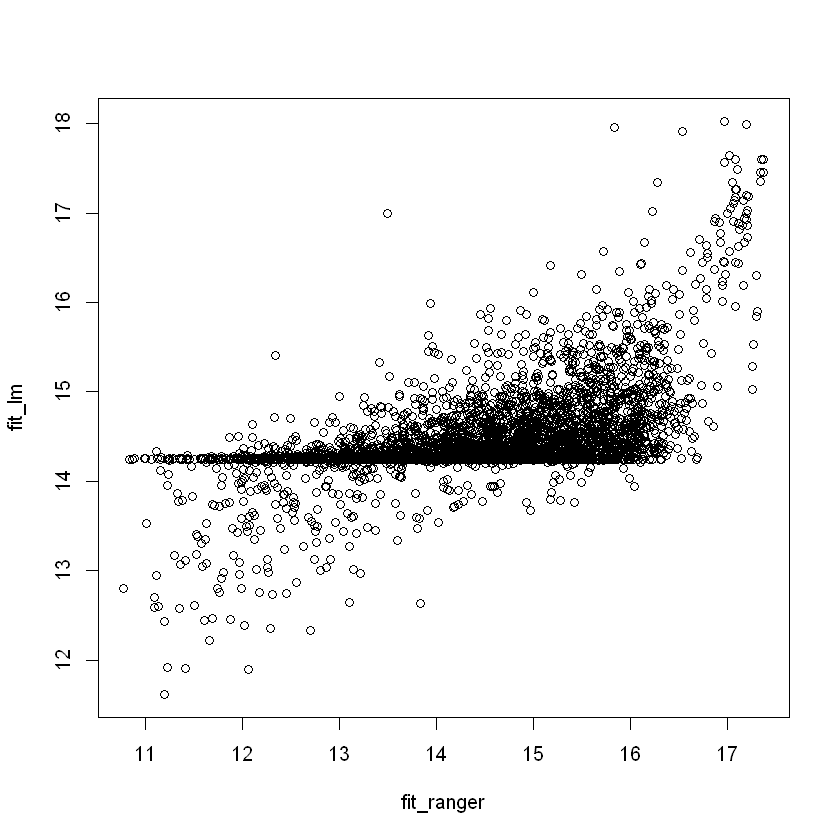

In [99]:
plot(fit_ranger, fit_lm)

In [ ]:
pred_final <- -

In [90]:
pred_ensemble_lm_tree <- (a_1 * pred_tree + a_2 * pred_lm)/(a_1 + a_2)

In [91]:
sqrt(mean((real - pred_ensemble_lm_tree)^2))

[1] 1.670271